In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
sns.set() # setting seaborn default for plots
%matplotlib inline

In [20]:
df=pd.read_csv('https://gist.githubusercontent.com/avmain/150f13c7c405d9c58ebaad9cf158cc29/raw/ce5cfe7c8ee588f2cc921a3cf05cac3976cbac7a/titanic_prepared_data.csv',error_bad_lines=False)

In [21]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df=df.dropna()

#taking care of categorical data
df['Gender'] = df.Sex.apply(lambda x:1 if x == 'male' else 0)
df=df.drop(['Sex'],axis=1)


In [23]:
print(df.shape)
df.head()

(891, 11)


,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize,Gender
0,0,22.0,7.2500,0,0,1,0,0,1,2,0
1,1,38.0,71.2833,1,0,0,1,0,0,2,0
2,1,26.0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,53.1000,1,0,0,0,0,1,2,0
4,0,35.0,8.0500,0,0,1,0,0,1,1,0


In [39]:
X = df.iloc[:, :1].values
y = df.iloc[:, 7].values

In [27]:
label_x = LabelEncoder()
X[:,5] = label_x.fit_transform(X[:,5])

onehotencoder = OneHotEncoder(categorical_features = [5])
X = onehotencoder.fit_transform(X).toarray()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print X_train.shape, y_train.shape

(623L, 1L) (623L,)


In [29]:
# take a look at Training Data: X_train and y_train

print("Total Data Used for Training : 75% ")
print("-----------------------------------")

print("Feature Matrix: (Training set -X)\n")
print("Shape : %s" %(str(X_train.shape))) 
print(pd.DataFrame(X_train).head())

print("\n")

print("Labelled Vector: (Training set -y)\n")
print("Shape : %s" %(str(y_train.shape))) 
print(pd.DataFrame(y_train).head())

Total Data Used for Training : 75% 
-----------------------------------
Feature Matrix: (Training set -X)

Shape : (668L, 100L)
    0    1    2    3    4    5    6    7    8    9  ...    90   91   92   93  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   

       94   95   96   97   98   99  
0  13.000  1.0  0.0  0.0  1.0  1.0  
1   6.975  0.0  0.0  0.0  1.0  1.0  
2   8.050  0.0  0.0  0.0  1.0  1.0  
3  83.475  0.0  0.0  0.0  1.0  2.0  
4   7.750  0.0  0.0  1.0  0.0  1.0  

[5 rows x 100 columns]


Labelled Vector: (Training set -y)

Shape : (668L,)
   0
0  0
1  0
2  0
3  0
4  1


In [30]:
# take a look at Testing Data: X_test and y_test

print("Total Data Used for Testing : 25% ")
print("-----------------------------------")

print("Feature Matrix: (Testing set -X)\n")
print("Shape : %s" %(str(X_test.shape))) 
print(pd.DataFrame(X_test).head())

print("\n")

print("Labelled Vector: (Testing set -y)\n")
print("Shape : %s" %(str(y_test.shape)))
print(pd.DataFrame(y_test).head())

Total Data Used for Testing : 25% 
-----------------------------------
Feature Matrix: (Testing set -X)

Shape : (223L, 100L)
    0    1    2    3    4    5    6    7    8    9  ...    90   91   92   93  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   1.0  1.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0  1.0   

        94   95   96   97   98   99  
0  26.2875  0.0  0.0  0.0  1.0  1.0  
1   8.0500  0.0  0.0  0.0  1.0  1.0  
2  65.0000  1.0  0.0  0.0  1.0  4.0  
3  56.4958  0.0  0.0  0.0  1.0  1.0  
4   7.9250  0.0  0.0  0.0  1.0  7.0  

[5 rows x 100 columns]


Labelled Vector: (Testing set -y)

Shape : (223L,)
   0
0  0
1  0
2  0
3  0
4  0


In [31]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [32]:
logisticregression = LogisticRegression()

# Fitting Multiclass Logistic Classification to the Training set
logisticregression.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logisticregression.predict(X_test)

print("\nModel trained successfully \n ")


Model trained successfully 
 


Model accuracy : 100.0000%


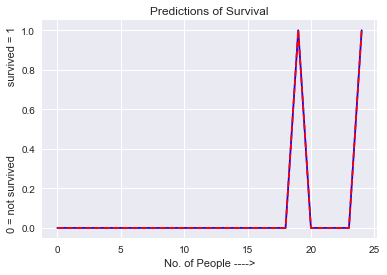

In [33]:
print("Model accuracy : %.4f" %(logisticregression.score(X_test, y_test)*100) + "%")

# plot between actual labels(y) -vs- predicted labels(y)
plt.title('Predictions of Survival')

# blue line  : Actual labels(0 or 1)
# red dashed : Predicted labels(0 or 1)
plt.plot(y_test[:25], color='blue', label='True labels')
plt.plot(y_pred[:25], 'r--', label='Predicted labels')

plt.xlabel('No. of People ---->')
plt.ylabel('0 = not survived                       survived = 1')
plt.grid(True)
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

100.0 %


In [35]:
clf2 = LogisticRegression(C=0.08)
clf2.fit(X_train, y_train.ravel()) #Trivia : What does ravel do?
y_pred_log_reg2 = clf2.predict(X_test)
acc_log_reg2 = round( accuracy_score(y_pred_log_reg2, y_test) * 100, 2)
print (str(acc_log_reg2) + ' %')

100.0 %
